# **Parkinson Disease Gene Array Dataset overview analysis :**
## Parkinson's disease :
Parkinson's disease (PD), or simply Parkinson's disease is a long-term degenerative disorder of the central nervous system that mainly affects the motor system. The symptoms usually emerge slowly, and as the disease worsens, non-motor symptoms become more common.The most obvious early symptoms are tremor, rigidity, slowness of movement, and difficulty with walking.Cognitive and behavioral problems may also occur with depression, anxiety, and apathy occurring in many people with PD.
## DataSet Description : 
Analysis of substantia nigrae from postmortem brains of patients with Parkinson’s disease (PD). Neurons in the substantia nigra, which produces dopamine, degenerate in PD. Results provide insight into the molecular pathogenesis of PD.

Platform:

GPL570: [HG-U133_Plus_2] Affymetrix Human Genome U133 Plus 2.0 Array

Downloading and cleaning Of dataset

Dimention : [54287 rows x 24 columns]

In [15]:
!rm gds2821.soft
!wget https://tmpfiles.org/dl/209547/gds2821.soft
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

df=pd.read_csv("gds2821.soft",sep="\t").dropna()
df=df[df.IDENTIFIER != "--Control"]
data=np.array(df.iloc[:,2:-1])
sample_name=np.array(df.columns[2:-1])
gene_name=np.array(df.IDENTIFIER)
df=pd.DataFrame(data,index=gene_name,columns=sample_name)

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d,index=gene_name,columns=sample_name)
print(scaled_df)
scaled_df=scaled_df.reset_index(drop=True)

--2022-02-09 07:31:49--  https://tmpfiles.org/dl/209547/gds2821.soft
Resolving tmpfiles.org (tmpfiles.org)... 104.21.21.16, 172.67.195.247, 2606:4700:3036::ac43:c3f7, ...
Connecting to tmpfiles.org (tmpfiles.org)|104.21.21.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9091822 (8.7M) [text/plain]
Saving to: ‘gds2821.soft’

gds2821.soft        100%[===================>]   8.67M  8.12MB/s    in 1.1s    

2022-02-09 07:31:51 (8.12 MB/s) - ‘gds2821.soft’ saved [9091822/9091822]

         GSM184355  GSM184360  GSM184361  ...  GSM184378  GSM184368  GSM184371
MIR4640   0.077942   0.049706   0.044870  ...   0.038053   0.068049   0.091080
RFC2      0.004749   0.004915   0.002815  ...   0.003308   0.003099   0.004602
HSPA6     0.002723   0.001078   0.001234  ...   0.002051   0.004213   0.002366
PAX8      0.009238   0.014716   0.008520  ...   0.007407   0.007501   0.008670
GUCA1A    0.001899   0.001969   0.000991  ...   0.000929   0.001251   0.000984
...            .

# Heat Map of Corelation Matrix formed between each Patient *Sample*

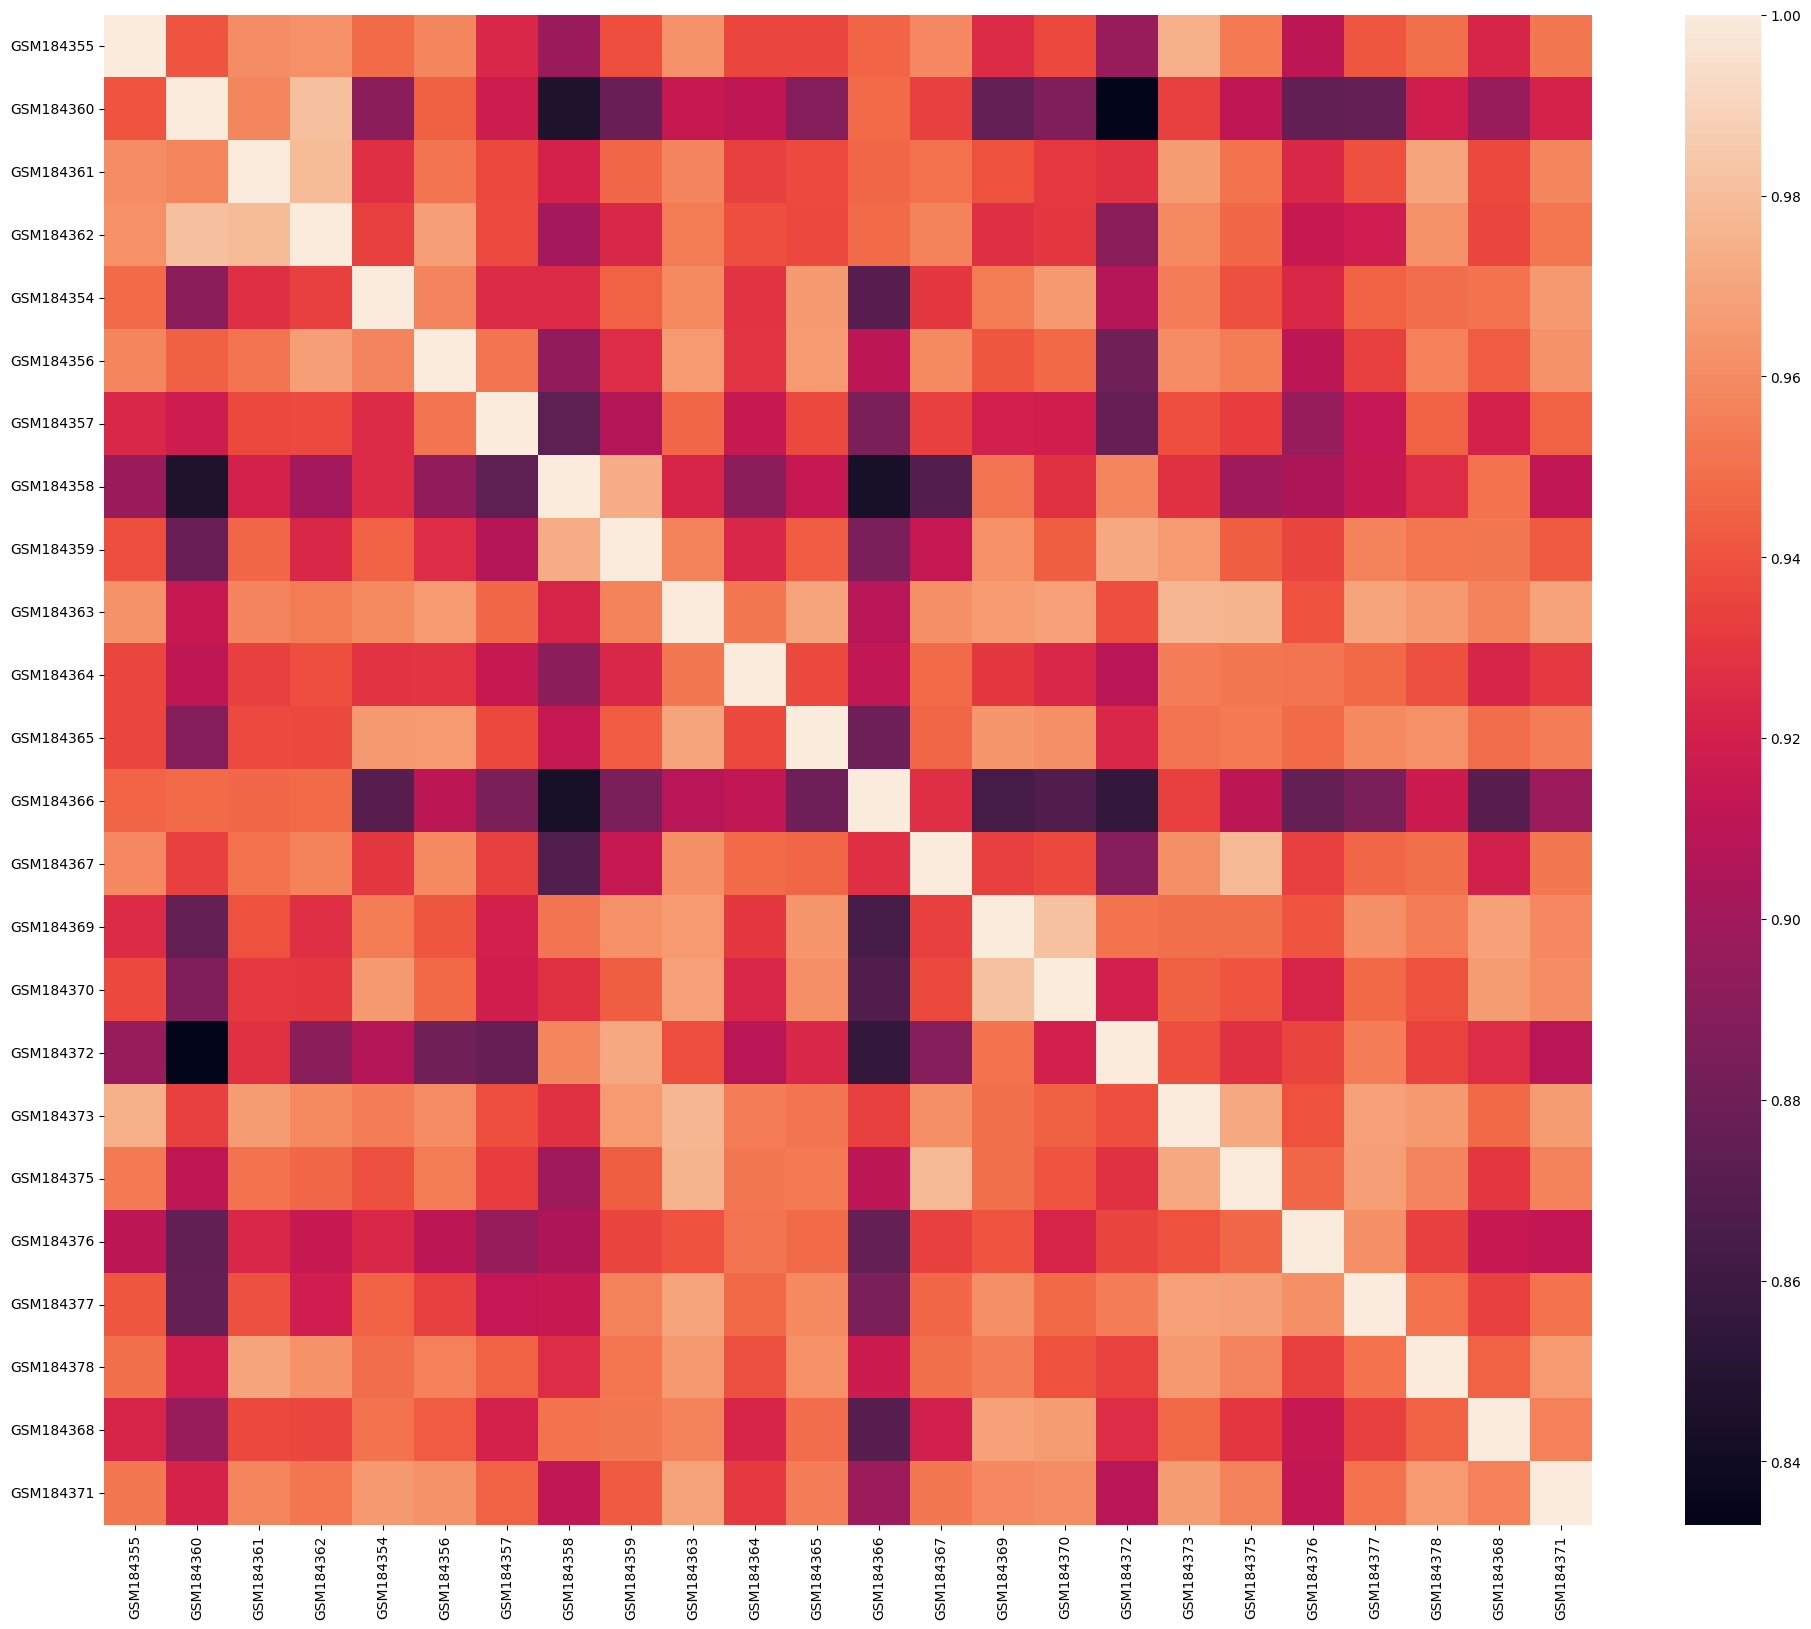

In [23]:
plt.rcParams['figure.figsize'] = [24, 20]
plt.rcParams['figure.dpi'] = 100
sn.heatmap(data = scaled_df.corr())
plt.show()

# Line Plot showing the different gene experession variation among all 24 patient data.

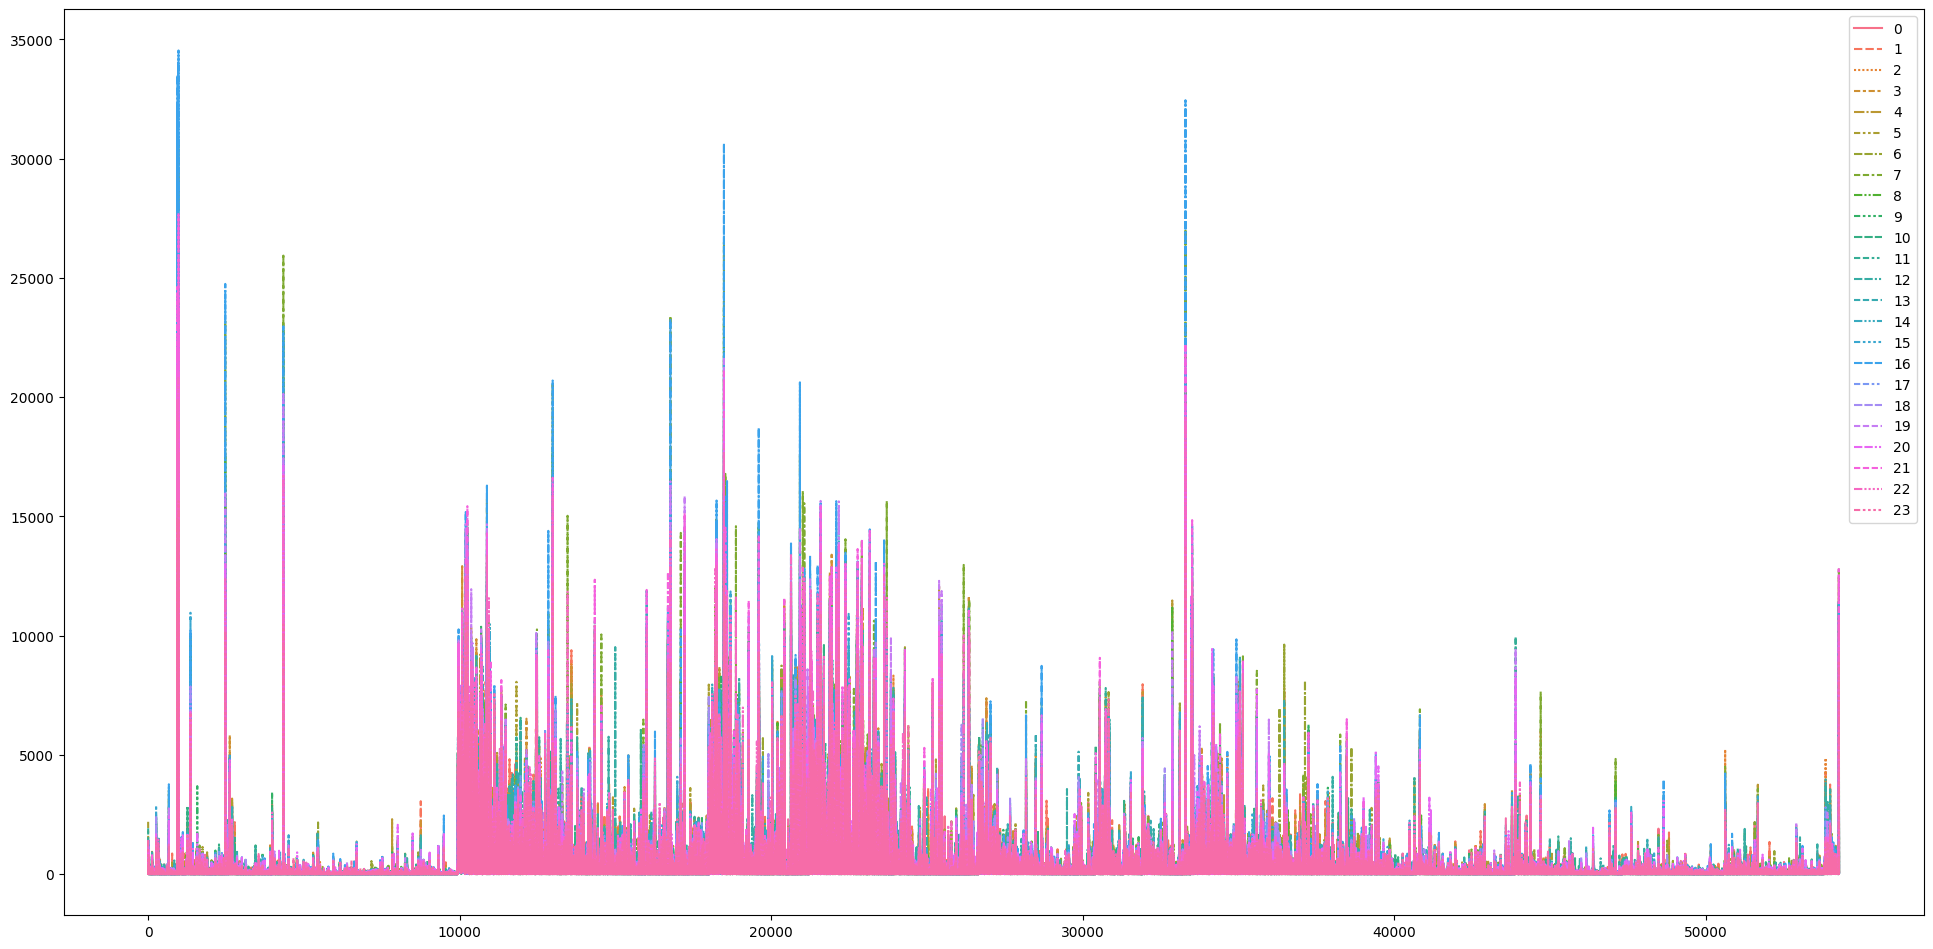

In [25]:
plt.rcParams['figure.figsize'] = [24, 12]
sn.lineplot(data=data)
plt.show()

# Line Plot Showing the Normalized gene experession values of genes selected according to their varience of expression shown in the 24 patient samples 

Consicutively showing Top 5 , 10 , next 10 and last 10 in top 30 respectively. Following is a bigger similar plot with top 100 genes of highest varience.

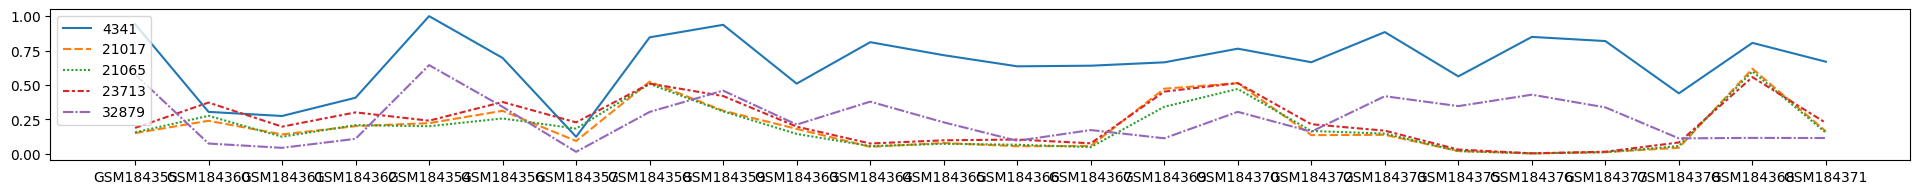

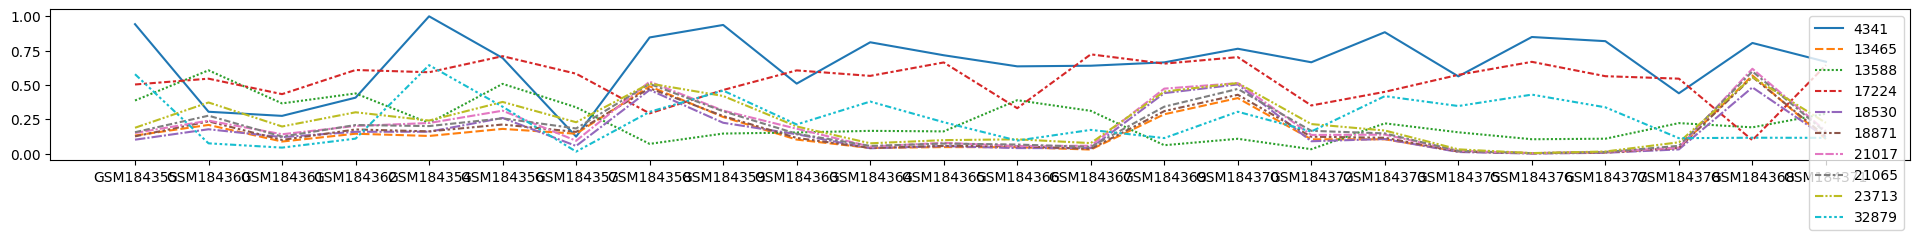

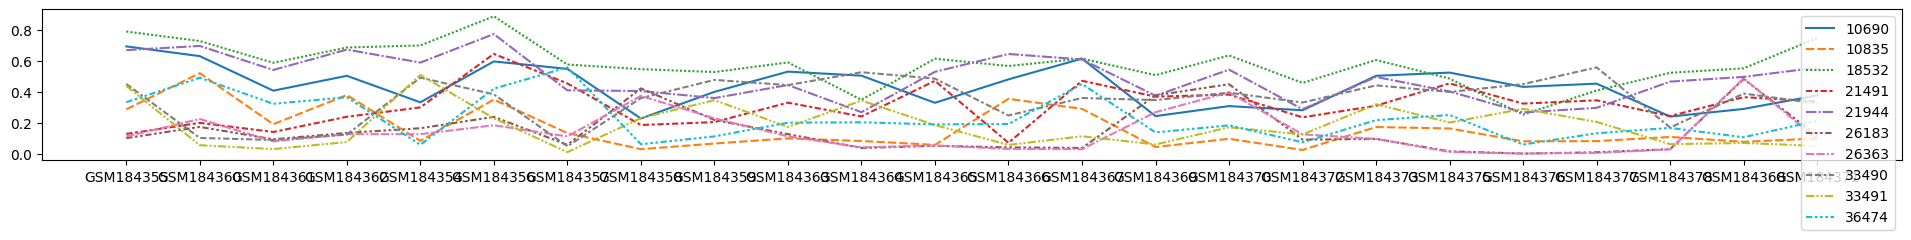

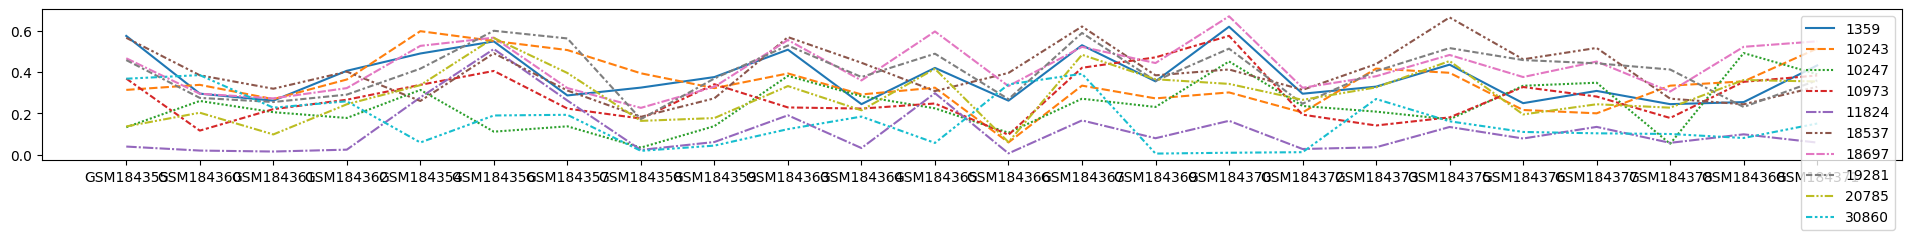

In [18]:
gene_var=scaled_df.var(1).sort_values(ascending=False)
plt.rcParams['figure.figsize'] = [24, 2]
sn.lineplot(data=scaled_df.T[gene_var[:5].index])
plt.show()
sn.lineplot(data=scaled_df.T[gene_var[:10].index])
plt.show()
sn.lineplot(data=scaled_df.T[gene_var[10:20].index])
plt.show()
sn.lineplot(data=scaled_df.T[gene_var[20:30].index])
plt.show()

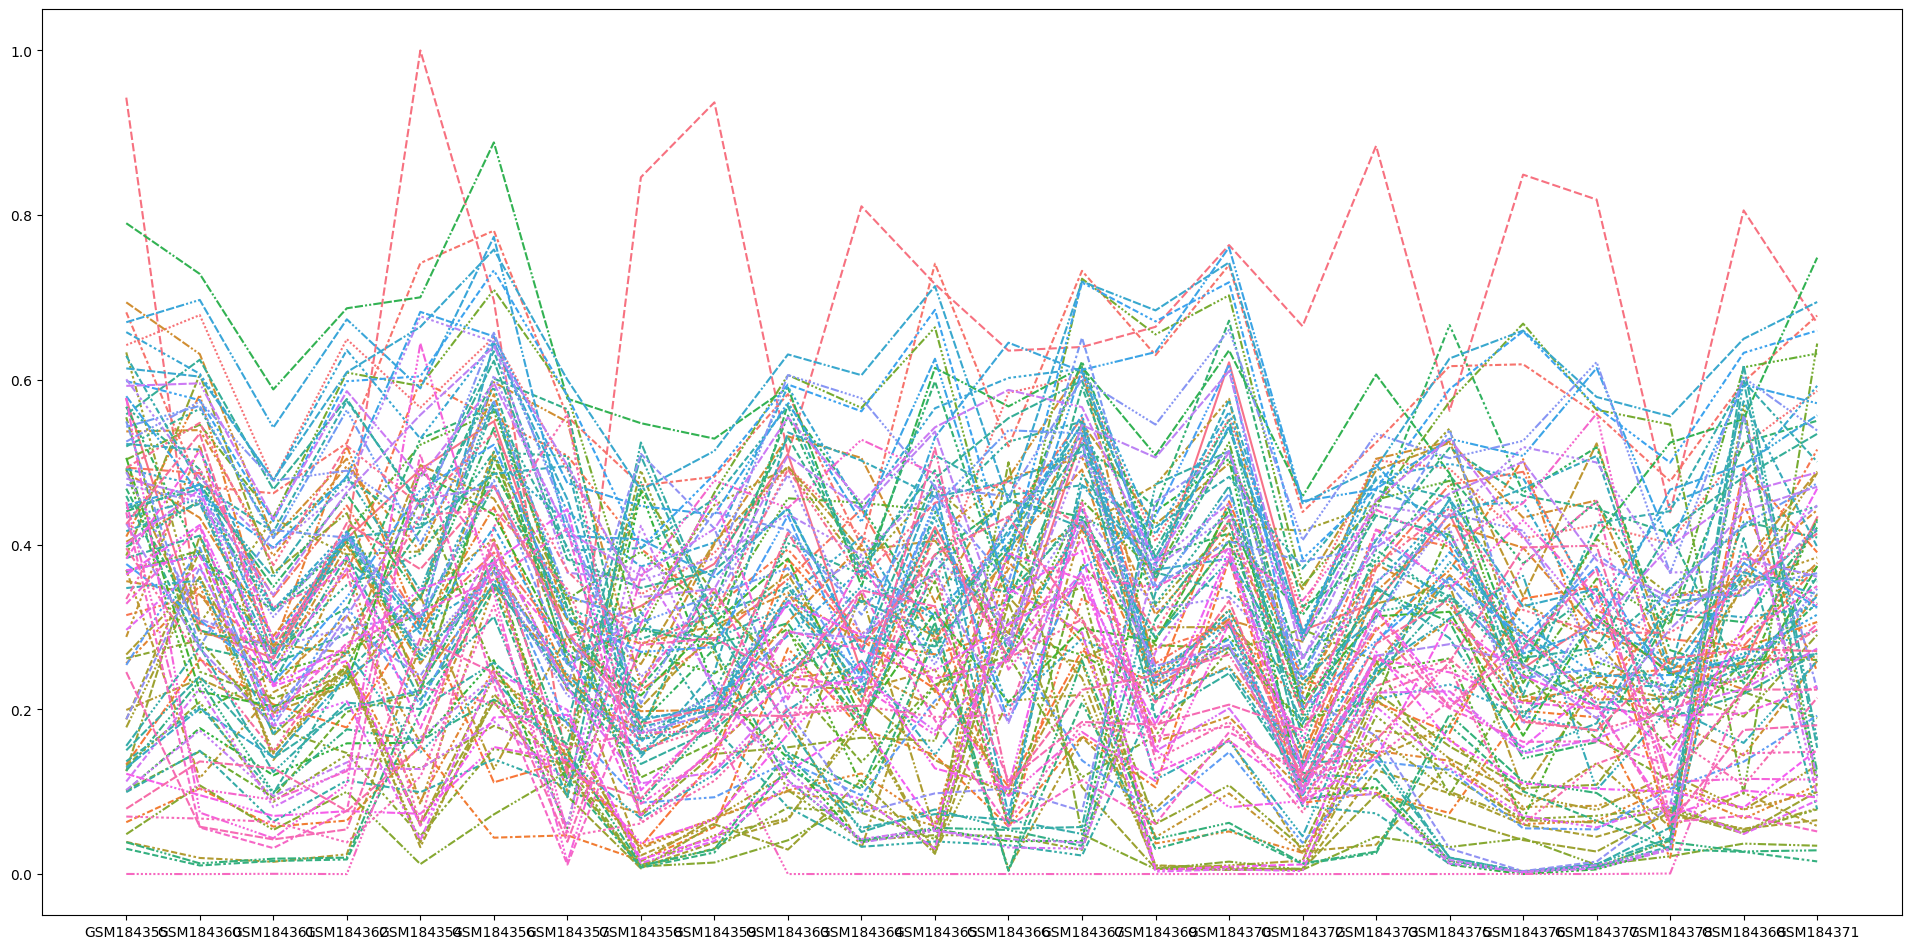

In [19]:
plt.rcParams['figure.figsize'] = [24, 12]
sn.lineplot(data=scaled_df.T[gene_var[:100].index],legend=False)
plt.show()

#Following is a simple Principle Component analysis of 2 components ploted against eachother in scaterplot.

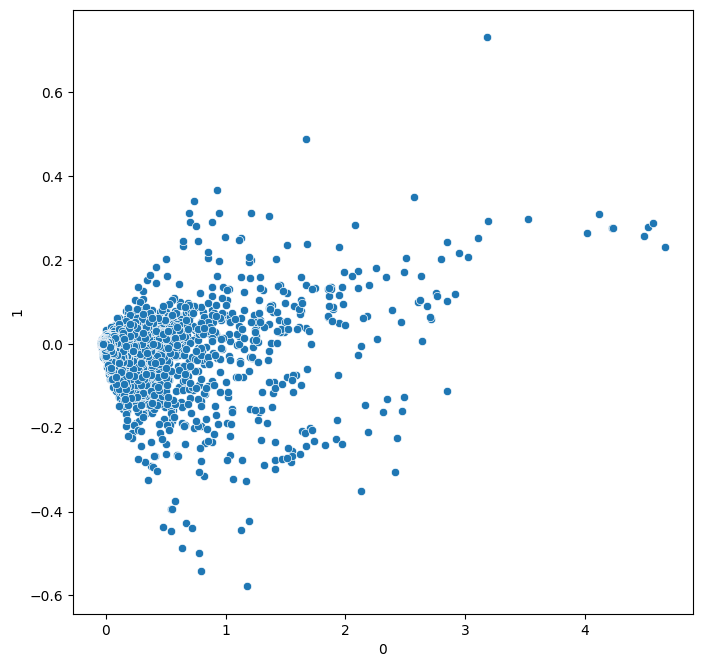

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(scaled_df))
x=pca_df[0]
y=pca_df[1]
plt.rcParams['figure.figsize'] = [8, 8]
sn.scatterplot(x=x, y=y,)
plt.show()

#Cluster Analysis
Cluster analysis of all the genes expressed with Kmeans and plot of Davies-Bouldin Index and Calinski-Harabasz Score against cluster k values.

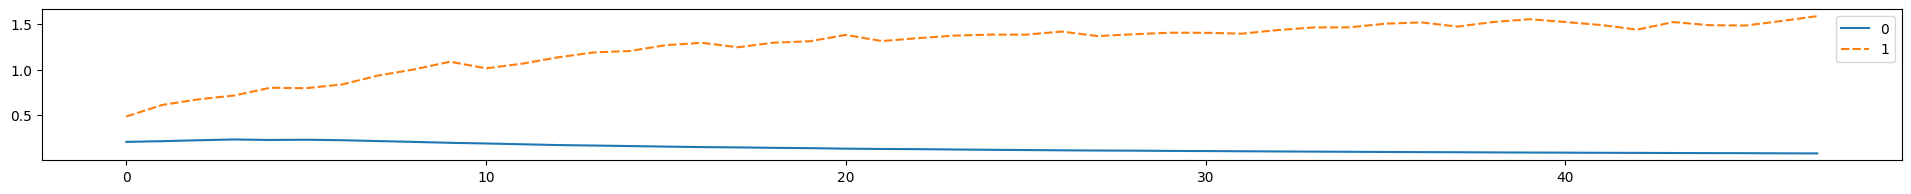

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score as dbscore
from sklearn.metrics import calinski_harabasz_score as chscore
bds=list()
chs=list()
for i in range(2,50):
    kmeans = KMeans(n_clusters=i, random_state=0)
    space_matrix=kmeans.fit_predict(scaled_df)
    bds.append(dbscore(scaled_df,space_matrix))
    chs.append(chscore(scaled_df,space_matrix))
norm = np.linalg.norm(np.array(chs))
chs=chs/norm
plt.rcParams['figure.figsize'] = [24, 8]
sn.lineplot(data=np.array([np.array(chs),np.array(bds)]).T)
plt.show()